<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate number detection.

Before runing this demo, please download models from [https://nomeroff.net.ua/models/](https://nomeroff.net.ua/models/) to **./models/** directory. 

In [1]:
#Specify device
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 
# os.environ["CUDA_VISIBLE_DEVICES"] = ""  # For CPU inference

In [2]:
 # dynamically grow the memory used on the GPU
from tensorflow.compat.v1.keras.backend import set_session
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True 
sess = tf.compat.v1.Session(config=config)
set_session(sess)

In [3]:
# Import all necessary libraries.
import numpy as np
import sys
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import copy

# NomeroffNet path
NOMEROFF_NET_DIR = os.path.abspath('../')
sys.path.append(NOMEROFF_NET_DIR)

In [4]:
from NomeroffNet.YoloV5Detector import Detector

detector = Detector()
detector.load()

Fusing layers... 


In [5]:
from NomeroffNet.BBoxNpPoints import NpPointsCraft

npPointsCraft = NpPointsCraft()
npPointsCraft.load()

craft_mlt_25k_2020-02-16.pth: 83.2MB [00:12, 6.82MB/s]                            
craft_refiner_CTW1500_2020-02-16.pth: 1.86MB [00:00, 6.36MB/s]                           


Loading weights from checkpoint (/var/www/nomeroff-netv2/nomeroff-net/NomeroffNet/Base/mcm/./models/NpPointsCraft/mtl/craft_mlt_25k_2020-02-16.pth)
Loading weights of refiner from checkpoint (/var/www/nomeroff-netv2/nomeroff-net/NomeroffNet/Base/mcm/./models/NpPointsCraft/refiner/craft_refiner_CTW1500_2020-02-16.pth)


In [6]:
from NomeroffNet.OptionsDetector import OptionsDetector
from NomeroffNet.TextDetector import TextDetector

# Import license plate recognition tools.
from NomeroffNet.RectDetector import  RectDetector

rectDetector = RectDetector()

optionsDetector = OptionsDetector()
optionsDetector.load("latest")

# Initialize text detector.
textDetector = TextDetector({
    "eu_ua_2004_2015": {
        "for_regions": ["eu_ua_2015", "eu_ua_2004"],
        "model_path": "latest"
    },
    "eu_ua_1995": {
        "for_regions": ["eu_ua_1995"],
        "model_path": "latest"
    },
    "eu": {
        "for_regions": ["eu"],
        "model_path": "latest"
    },
    "ru": {
        "for_regions": ["ru", "eu-ua-fake-lnr", "eu-ua-fake-dnr"],
        "model_path": "latest" 
    },
    "kz": {
        "for_regions": ["kz"],
        "model_path": "latest"
    },
    "ge": {
        "for_regions": ["ge"],
        "model_path": "latest"
    },
    "su": {
        "for_regions": ["su"],
        "model_path": "latest"
    }
})

In [7]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

[]
[]
[]
[]


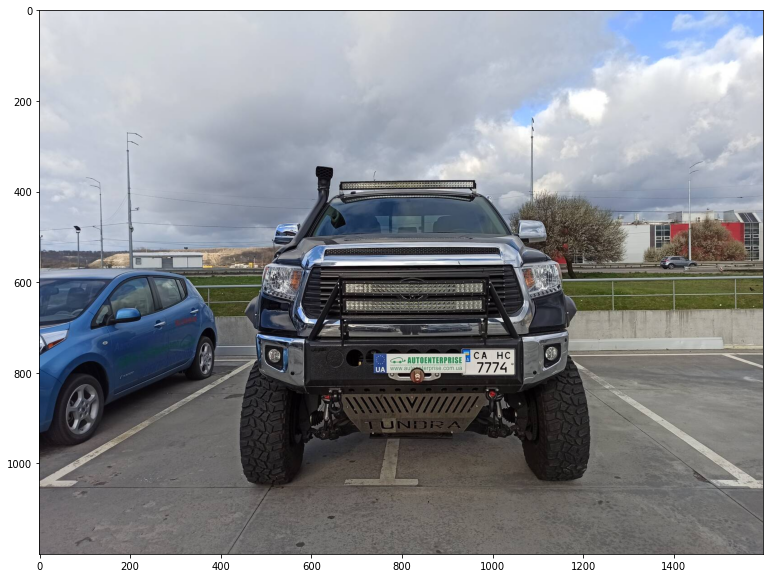

[array([[     203.21,      408.27],
       [     270.09,      408.27],
       [     270.09,      453.07],
       [     203.21,      453.07]])]


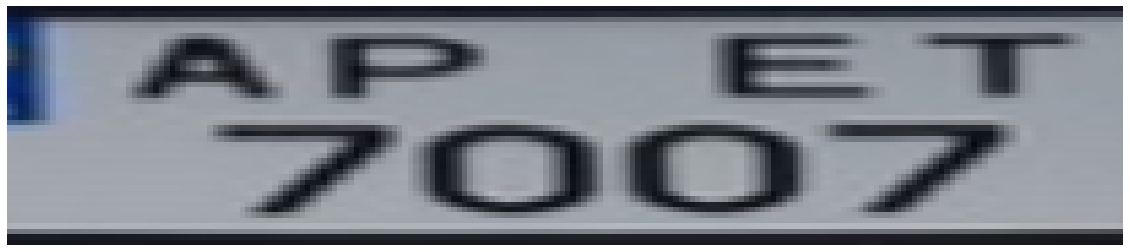

['kz']
[2]
['M577O0']


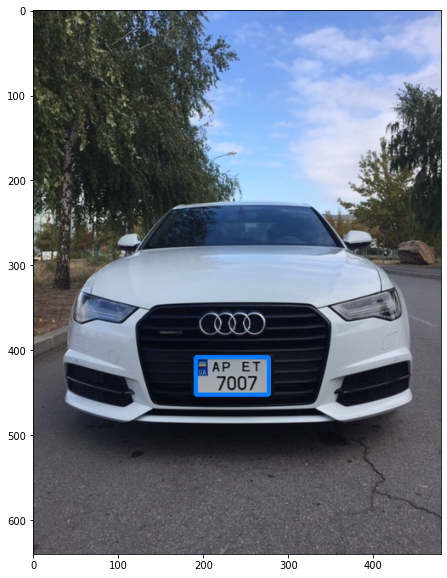

[array([[        351,      654.13],
       [        585,      663.68],
       [        585,      719.94],
       [        351,      710.39]])]


['su']
[1]
['В8233ХА']


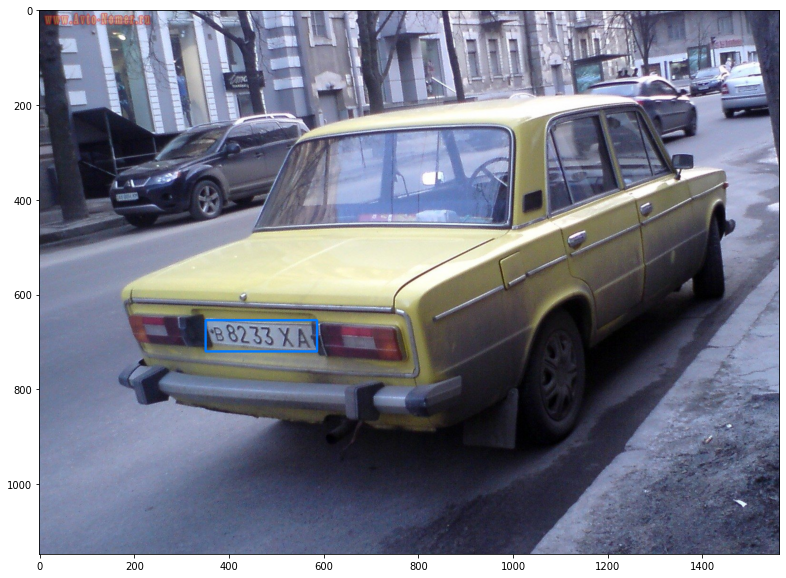

[array([[        164,      385.17],
       [        307,      455.72],
       [        307,       520.3],
       [        164,      449.75]])]


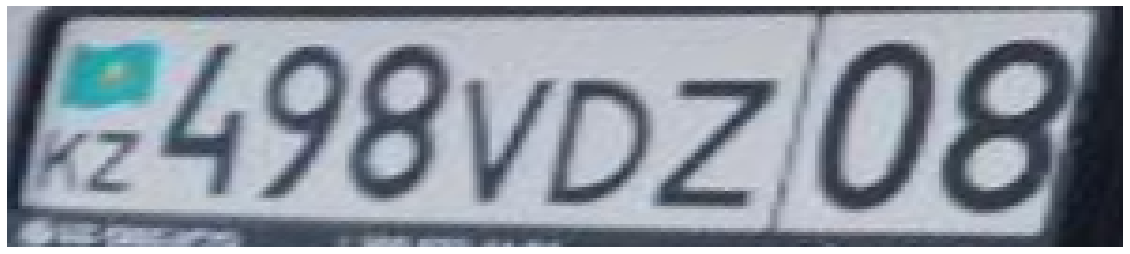

['kz']
[1]
['498VDZ08']


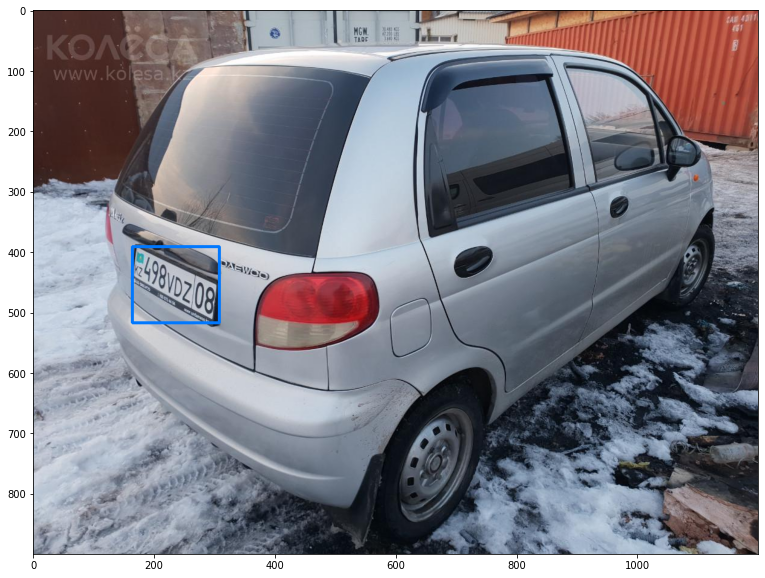

[array([[     1793.2,      915.55],
       [     1793.2,      979.55],
       [       1701,      1053.3],
       [       1701,      989.27]])]


['eu_ua_2015']
[1]
['AA8809TI']


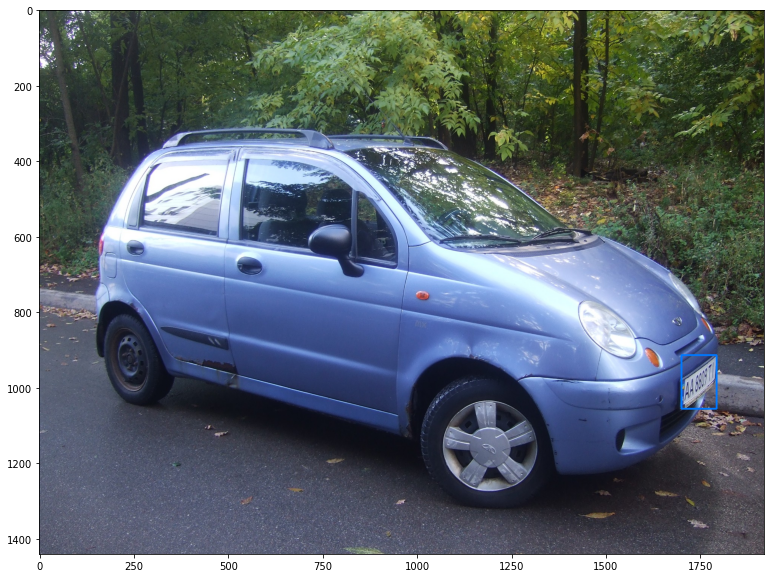

[array([[     1085.7,      463.28],
       [     1085.7,      525.46],
       [     872.27,      572.41],
       [     872.27,      510.24]])]


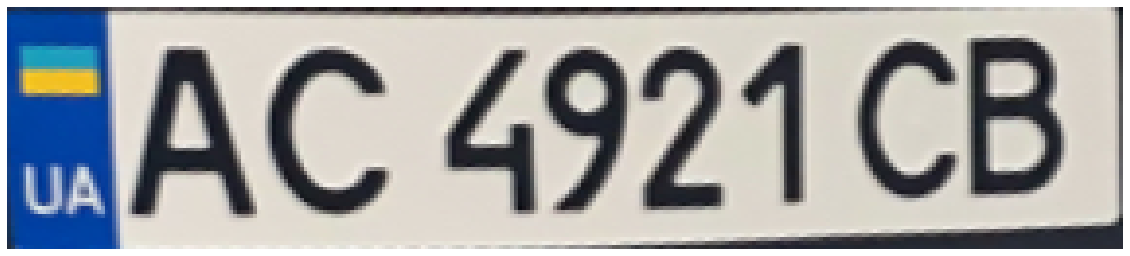

['eu_ua_2015']
[1]
['AC4921CB']


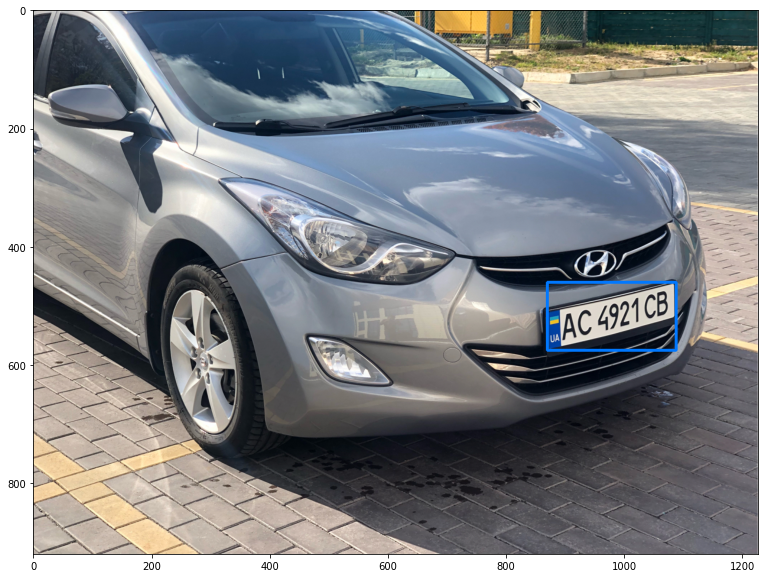

[array([[     648.31,      462.62],
       [     785.35,      464.66],
       [     785.35,      497.52],
       [     648.31,      495.48]])]


['ge']
[1]
['00964GG']


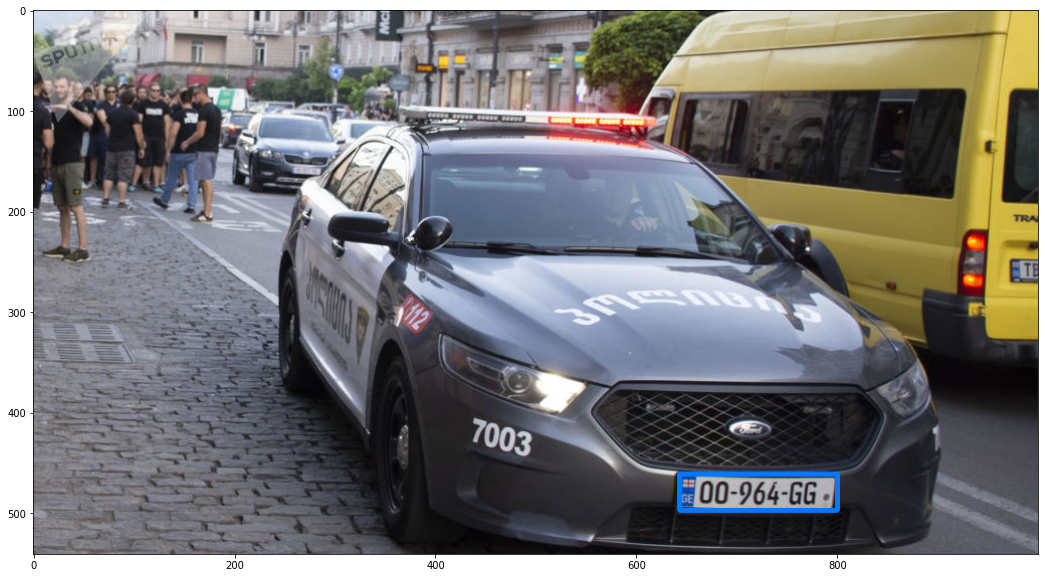

[array([[        284,      607.35],
       [        408,      621.94],
       [        408,      715.61],
       [        284,      701.03]])]


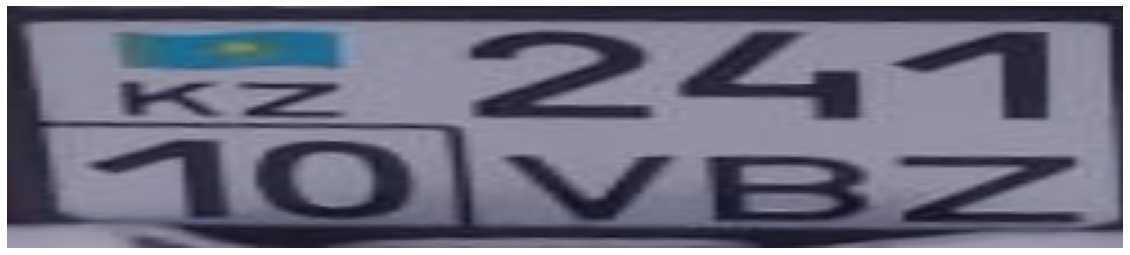

['kz']
[2]
['2411DVB']


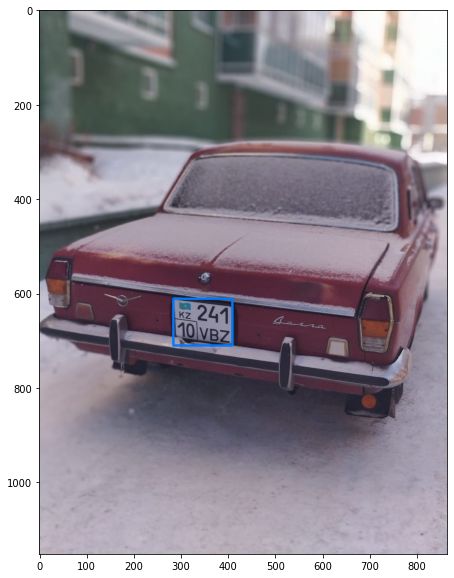

[array([[     711.27,      711.92],
       [     782.13,      722.04],
       [     782.13,      779.48],
       [     711.27,      769.36]])]


/var/www/nomeroff-netv2/nomeroff-net/NomeroffNet/../CRAFT-pytorch/craft_utils.py:239: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  polys = np.array(polys)


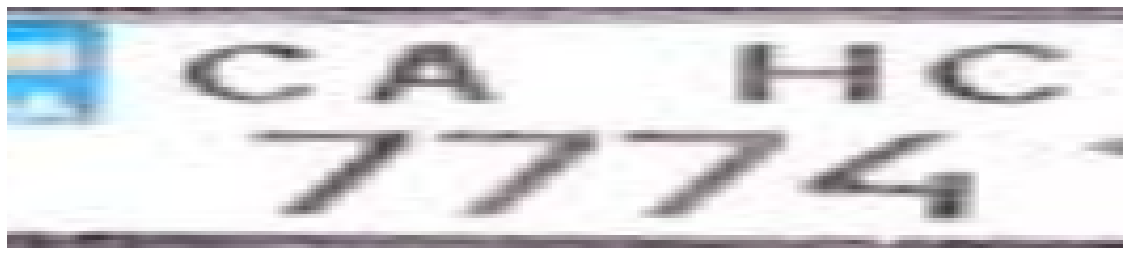

['eu_ua_2015']
[2]
['AA8977TH']


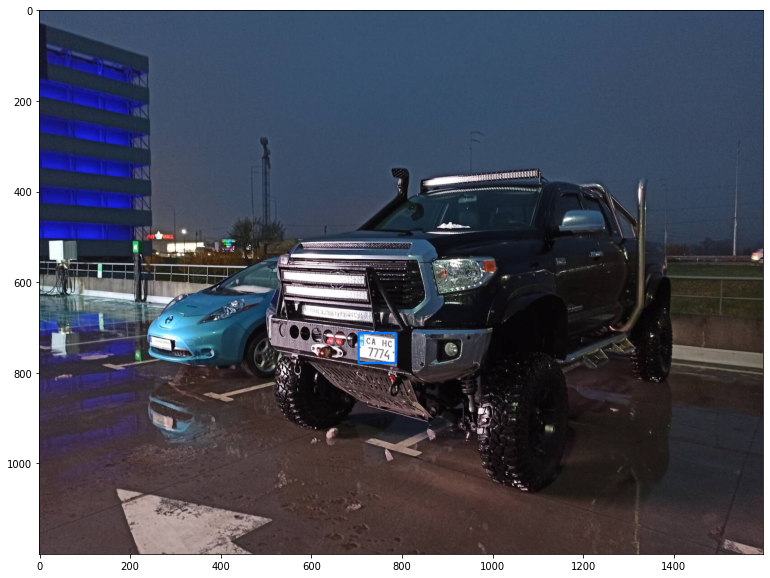

[array([[        944,         381],
       [        944,         405],
       [        851,         405],
       [        851,         381]]), array([[        524,      380.93],
       [        524,      401.73],
       [     457.59,      401.73],
       [     457.59,      380.93]])]


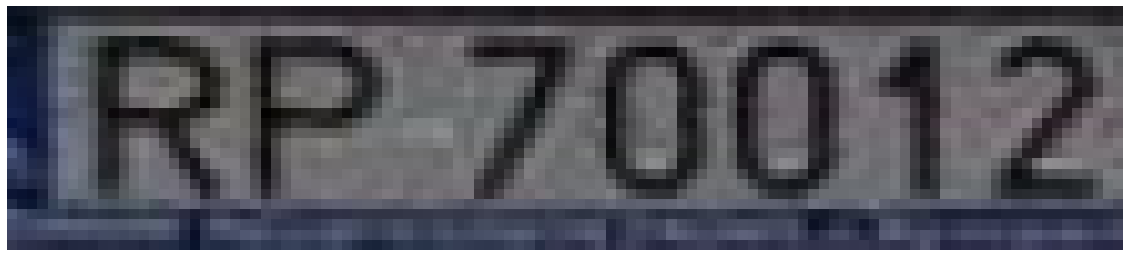

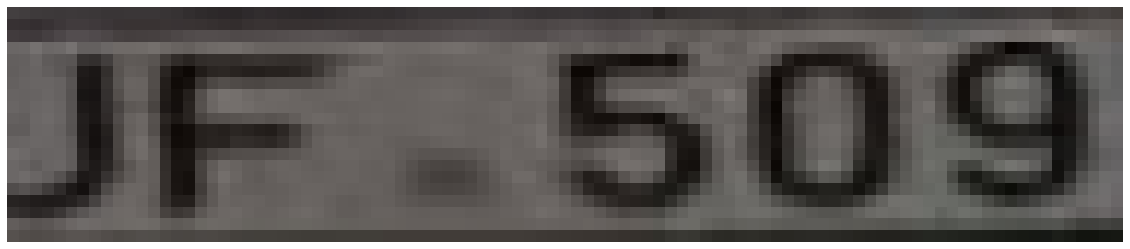

['eu', 'xx_unknown']
[1, 0]
['RP70012', '']


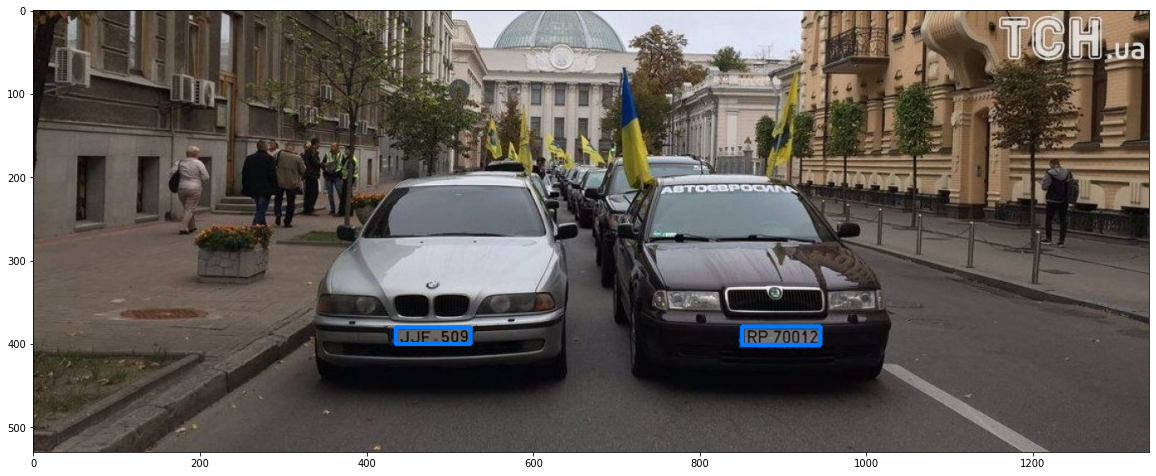

In [8]:
rootDir = 'images/*'

imgs = [mpimg.imread(img_path) for img_path in glob.glob(rootDir)]

for img in imgs:
    targetBoxes = detector.detect_bbox(copy.deepcopy(img))
    targetBoxes = targetBoxes

    all_points = npPointsCraft.detect(img, targetBoxes)
    all_points = [ps for ps in all_points if len(ps)]
    print(all_points)

     # cut zones
    zones = rectDetector.get_cv_zonesBGR(img, all_points)
    toShowZones = rectDetector.get_cv_zonesRGB(img, all_points)
    for zone, points in zip(toShowZones, all_points):
        plt.axis("off")
        plt.imshow(zone)
        plt.show()

    # find standart
    regionIds, stateIds, countLines = optionsDetector.predict(zones)
    regionNames = optionsDetector.getRegionLabels(regionIds)
    print(regionNames)
    print(countLines)

    # find text with postprocessing by standart  
    textArr = textDetector.predict(zones, regionNames, countLines)
    print(textArr)
    
    # draw rect and 4 points
    for targetBox, points in zip(targetBoxes, all_points):
        cv2.rectangle(img, 
                      (int(targetBox[0]), int(targetBox[1])), 
                      (int(targetBox[2]), int(targetBox[3])), 
                      (0,120,255), 
                      3)
    plt.imshow(img)
    plt.show()